# Project Final Submission Template

### Step 1a: Planning 
#### Identify the information in the file your program will read

Describe (all) the information that is available. Be sure to note any surprising or unusual features. (For example, some information sources have missing data, which may be blank or flagged using values like -99, NaN, or something else.)

<font color="blue">
show id
    
type(movie or TV)
    
title
    
director
    
cast
    
country
    
date_added
    
release_year
    
rating
    
duration
</font>

### Step 1b: Planning 
#### Brainstorm ideas for what your program will produce
#### Select the idea you will build on for subsequent steps

You must brainstorm at least three ideas for graphs or charts that your program could produce and choose the one that you'd like to work on. You can choose between a line chart, histogram, bar chart, scatterplot, or pie chart.

If you would like to change your project idea from what was described in the proposal, you will need to get permission from your project TA. This is intended to help ensure that your new project idea will meet the requirements of the project. Please see the project proposal for things to be aware of when communicating with your project TA.

<font color="blue">
    
Find the total number of TV shows and movies respectively in the single year between 2019 and 2021  (use bar chart)
    
The percentage of Country of production in movie and TV-show during 2019-2021  (use pie chart)
    
The total average duration of movie and TV-show during 2019-2021    (use bar chart)</font>

#### We select the first idea using bar chart


### Step 1c: Planning 
#### Write or draw examples of what your program will produce

You must include an image that shows what your chart or plot will look like. You can insert an image using the Insert Image command near the bottom of the Edit menu.

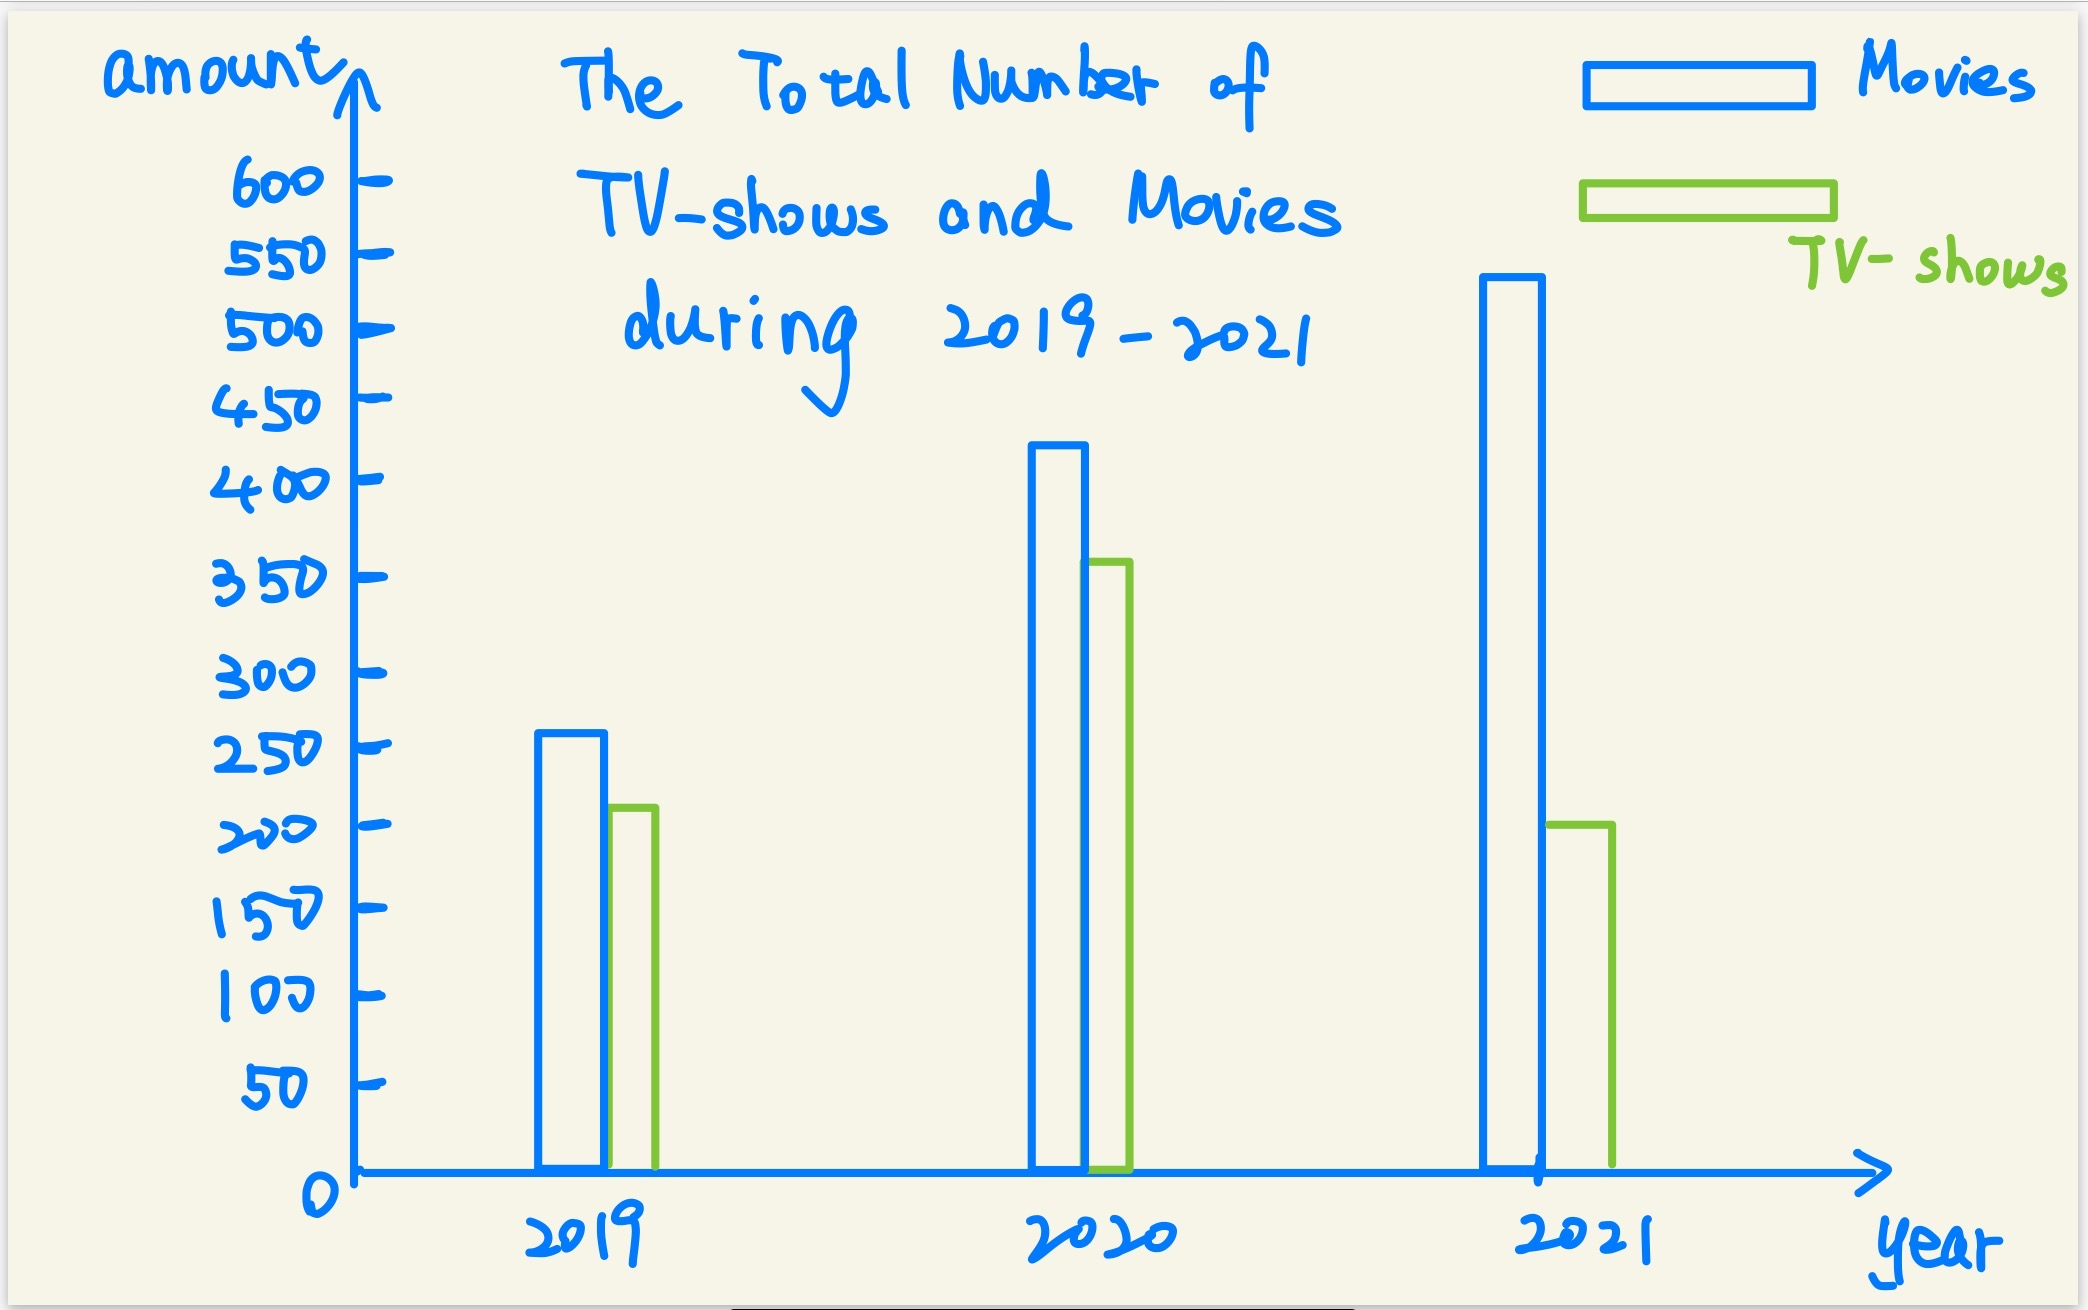

### Step 2a: Building
#### Document which information you will represent in your data definitions
#### Design data definitions

Before you design data definitions in the code cell below, you must explicitly document here which information in the file you chose to represent and why that information is crucial to the chart or graph that you'll produce when you complete step 2c.

<font color="blue">We will choose the rows representing type and the date_added in the document because we need to find the total number of TV shows and movies respectively in the single year between 2019 and 2021</font>

In [2]:
from cs103 import *
import csv
from typing import NamedTuple, List
from enum import Enum
import matplotlib.pyplot as plt

In [3]:
Type = Enum('Type', ['Movie', 'TV_Show'])
#interp. the type is either movie or tv_show
# examples are redundant for enumerations   

@typecheck
def fn_for_type(t: Type) -> ...:
    # template based on Enumeration
    if t == Type.Movie:
        return ...
    elif t == Type.TV_Show:
        return ...
    

TypeData = NamedTuple('TypeData',[('type',Type),
                                  ('date_added', str)])
#interp. type data including its date_added_year and its type 
TD1 = TypeData(Type.TV_Show, "November 24, 2021")
TD2 = TypeData(Type.Movie, "November 26, 2021")
TD3 = TypeData(Type.Movie, "November 25, 2021")

@typecheck
# template based on compound and the reference rule
def fn_for_type_data(td:TypeData)->...:
    return ...(fn_for_type(td.type),
               td.date_added)

# List[TypeData]
# interp. a list of TypeData

LOTD0 = []
LOTD1 = [TD1,TD2,TD3]
LOTD2 = [TD1,TD2]

@typecheck
# template based on arbitrary-sized and the reference rule
def fn_for_lotd(lotd: List[TypeData]) -> ...:
    # description of the acc
    acc = ... # type: ...
    for td in lotd:
        acc = ...(acc, fn_for_type_data(td))
    return ...(acc)

### Step 2b and 2c: Building
#### Design a function to read the information and store it as data in your program
#### Design functions to analyze the data


Complete these steps in the code cell below. You will likely want to rename the analyze function so that the function name describes what your analysis function does.

Unless approved by your project TA, you **cannot** use libraries such as `numpy` or `pandas`. The project is meant as a way for you to demonstrate your knowledge of the learning goals in this course. While it is convinent to use external libraries, it will do all the work and will not help us gauge your mastery of the concepts.

You also cannot use built in list functions (e.g., `sum` or `average`) when writing code to do your substantial computation. Normally we encourage you to make use of what is already available but in this case, the final project involves demonstrating skills from class (e.g., how to work with a list). Using pre-built functions for this does not enable you to demonstrate what you know.

If you wish to change your project idea, you must **first** obtain permission from your TA. When contacting your TA, please provide a valid reason for why you want to change your project. Each time you change your topic idea, your TA will have to evaluate it to see if it will meet all of the project requirements. This is non-trivial task during one of the busiest times of the semester. As such, the deadline for project idea changes will be 3 business days before the deadline. Note that the deliverable deadline will not be extended and there is no compensation for the time you spent on the previous idea.

In [4]:
@typecheck
def read(filename: str) -> List[TypeData]:
    """    
    reads information from the specified file and returns a list of TypeData
    """
    #return []  #stub
    # Template from HtDAP
    # loc contains the result so far
    loc = [] # type: List[TypeData]

    with open(filename) as csvfile:
        
        reader = csv.reader(csvfile)
        next(reader) # skip header line

        for row in reader:
            c = TypeData(parse_type(row[1]) ,parse_year(row[6]))
            loc.append(c)
    
    return loc
@typecheck
def parse_type(r:str)->Type:
    """
    produces the Type corresponding to its string representation r
    (e.g., Type.movie for "Movie")

    Assumes that r is a type string, one of: Movie, TV Show
    """
    #return Type.movie #stub
    # template based on Atomic Distinct but took inspiration from Type template
    if r == "Movie":
        return Type.Movie
    elif r == "TV Show":
        return Type.TV_Show
    
@typecheck
def parse_year(y:str)->int:
    """
    convert the str of year in that row into a int
    """
    #return0 #stub
    #template from Atomic Non-Distinct
    y = y.split(',')
    return int(y[1])




# Begin testing
start_testing()

# Examples and tests for read
expect(read("disney_plus_titles_test1.csv"), [TypeData(Type.Movie,2021), TypeData(Type.Movie,2021)])
expect(read("disney_plus_titles_test2.csv"), [TypeData(Type.Movie,2021), TypeData(Type.Movie,2021), TypeData(Type.TV_Show,2021)])

# show testing summary
summary()

2 of 2 tests passed


### Final Graph/Chart

Now that everything is working, you **must** call `main` on the intended information source in order to display the final graph/chart:

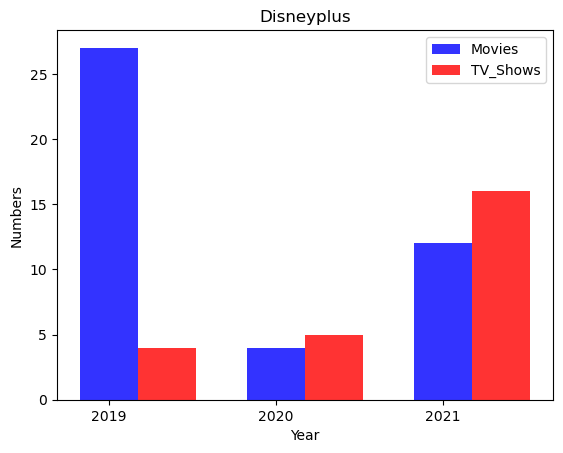

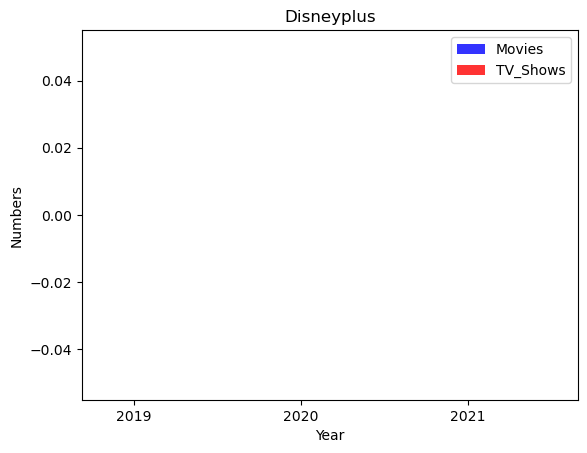

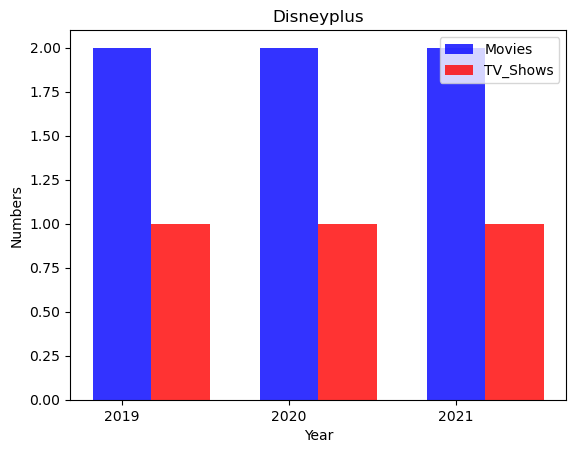

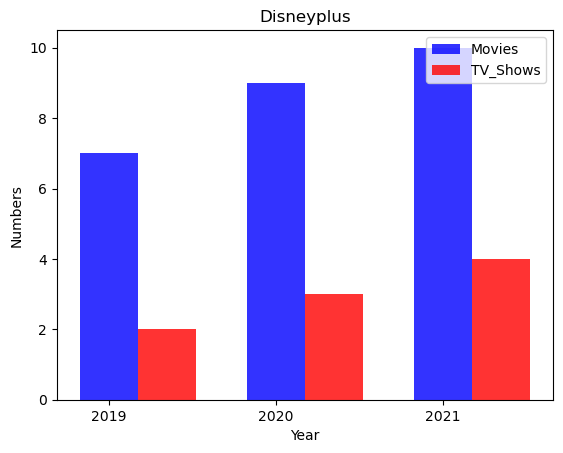

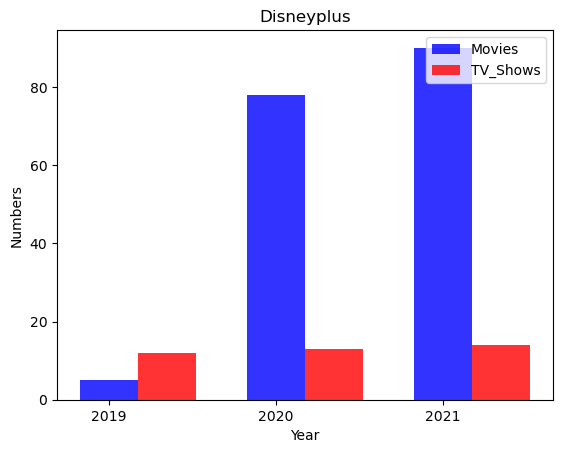

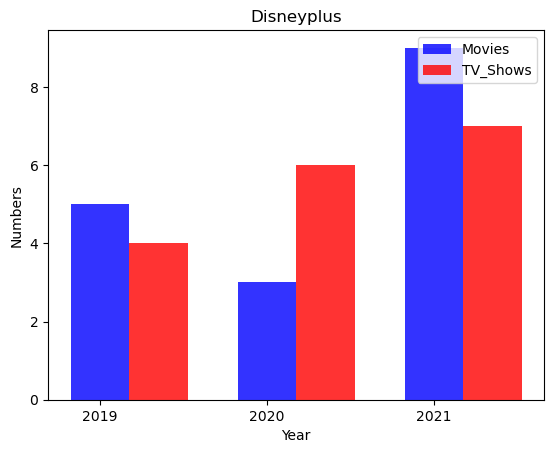

25 of 25 tests passed


In [5]:
@typecheck
def main(filename:str)->None:
    """
    Read the file from given file name, return a list of total number of movie or tv show in different year
    """
    #return [] #stub
    #template from HtDAP, based on function composition 
    return show_bar_chart(read(filename))


@typecheck
def show_bar_chart(lotd:List[TypeData])->None:
    """
    shows a bar chart of the movies and tvshows and the total number of movie and tvshows in each year
    """
    #return None #stub
    #template based on visualization
    return displayed_two_bar_charts(get_num_movies(lotd),get_num_tv_shows(lotd))



@typecheck
def displayed_two_bar_charts(movies:List[int],
                            tvshows:List[int])->None:
    """
    Plot a bar graph with movies and tvshows means side-by-side labelled by year
    
    """
    #return None #stub
    #template based on visualization
    # the width of each bar
    bar_width = 0.35
    # the middle coordinate for each of the bars for the first bar chart (movies)
    middle_of_bars_movies = produce_num_sequence(movies, 0, 1)
    # the middle coordinate for each of the bars for the second bar chart (tvshows)
    middle_of_bars_tvshows = produce_num_sequence(tvshows, bar_width, 1)
    
    opacity = 0.8
    
    rects1 = plt.bar(middle_of_bars_movies, 
                     movies,                
                     bar_width,
                     alpha=opacity,
                     color='b',                      
                     label='Movies')
    
    rects2 = plt.bar(middle_of_bars_tvshows, 
                     tvshows, 
                     bar_width,
                     alpha=opacity,
                     color='r',                       
                     label='TV_Shows')
    
    # set the labels for the x-axis, y-axis, and plot title
    plt.xlabel('Year')
    plt.ylabel('Numbers')
    plt.title('Disneyplus')
    
    # set the labels for each 'tick' on the x-axis
    plt.xticks(middle_of_bars_movies,["2019", "2020", "2021"])
    
    plt.legend(loc='upper right')
    
    plt.show()
    
    return None

@typecheck
def produce_num_sequence(values: List[float], initial: float, gap: float) -> List[float]:
    """
    Produce a list of numbers like [initial, initial + gap, initial + 2*gap, ...] of the same
    length as values, e.g., to give alignment coordinates for a plot. The number
    of numbers in the list is equal to len(values). The first value is initial. The gap between values
    is gap.
    
    E.g., [5,15,25,35,45,55,65,75] for 8 values, initial == 5, and gap == 10.
    """
    #return []  #stub
    # Template from List[float] with two additional parameters
    
    # nums is the numbers for the values seen so far
    nums = []  # type: List[float]
    
    # next_num is the next number to use
    next_num = initial
    
    for val in values:
        nums.append(next_num)
        next_num = next_num + gap
    
    return nums

@typecheck
def get_num_movies(lotd:List[TypeData])->List[int]:
    """
    return a list of the number of movies in each year
    """
    # return [] #stub
    # template based on List[TypeData]
    filter_2019 = filter_year(filter_movie(lotd), 2019)
    filter_2020 = filter_year(filter_movie(lotd), 2020)
    filter_2021 = filter_year(filter_movie(lotd), 2021)
    
    total_2019 = get_total(filter_2019)
    total_2020 = get_total(filter_2020)
    total_2021 = get_total(filter_2021)
    
    return [total_2019, total_2020,total_2021]

@typecheck
def get_num_tv_shows(lotd:List[TypeData])->List[int]:
    """
    return a list of the number of movies in each year
    """
    # return [] #stub
    # template based on List[TypeData]
    filter_2019 = filter_year(filter_tv_show(lotd), 2019)
    filter_2020 = filter_year(filter_tv_show(lotd), 2020)
    filter_2021 = filter_year(filter_tv_show(lotd), 2021)
    
    total_2019 = get_total(filter_2019)
    total_2020 = get_total(filter_2020)
    total_2021 = get_total(filter_2021)
    
    return [total_2019, total_2020,total_2021]
@typecheck
def get_total(lotd:List[TypeData])->int:
    """
    return the total number of movies or tvshows in a specific year
    """
    #return 0 #stub
    #template from List[TypeData]
    #the total number of movies or tvshows seen so far
    num = 0 #int
    for td in lotd:
        num = num + 1
    return num

@typecheck
def filter_year(lotd:List[TypeData], year:int)->List[TypeData]:
    """
    return a list of TypeData in the same year and same type
    """
    #return List[TypeData] #stub
    #template from List[TypeData] with an additional parameter
    # the list of TypeData in the same year and same type seen so far
    acc = [] #List[TypeData]
    for td in lotd:
        if judge_year(td,year):
            acc.append(td)
    return acc

@typecheck
def judge_year(td:TypeData,year:int)->bool:
    """
    return True if the date_added year is the same as year
    return False otherwise
    """
    #return True #stub
    #template from TypeData with an additional parameter
    return td.date_added == year
    
    
@typecheck
def filter_movie(lotd:List[TypeData])->List[TypeData]:
    """
    return a list of TypeData that only contains movie type
    """
    #return [] #stub
    #template based on List[TypeData]
    # movie contains the TypeData that only contains movie type seen so far
    movie = [] # type: List[TypeData]
    for td in lotd:
        if is_movie(td):
            movie.append(td)
    return movie

@typecheck
def is_movie(td: TypeData) -> bool:
    """
    return True if it is a movie type
    return False otherwise
    """
    #return True #stub
    #template from TypeData
    return td.type == Type.Movie


    
@typecheck
def filter_tv_show(lotd:List[TypeData])->List[TypeData]:
    """
    return a list that only contains tv shows type
    """
    #return [] #stub
    #template based on List[TypeData]
    # tv_show contains the TypeData that only contains tv_show type seen so far
    tv_show = [] # type: list
    for td in lotd:
        if is_tv_show(td):
            tv_show.append(td)
    return tv_show

@typecheck
def is_tv_show(td: TypeData) -> bool:
    """
    return True if it is a tv shows type
    return False otherwise
    """
    #return True #stub
    #template from TypeData
    return td.type == Type.TV_Show



start_testing()
#Examples and tests for main
expect(main("disney_plus_titles_test1.csv"),None)
expect(main("disney_plus_titles_test2.csv"),None)
expect(main("disney_plus_titles_test3.csv"),None)

#Examples and tests for show_bar_chart
expect(show_bar_chart(LOTD0),None)
expect(show_bar_chart([TypeData(Type.Movie,2021), TypeData(Type.Movie,2021), TypeData(Type.TV_Show,2021),TypeData(Type.Movie,2020), TypeData(Type.Movie,2020), TypeData(Type.TV_Show,2020),TypeData(Type.Movie,2019), TypeData(Type.Movie,2019), TypeData(Type.TV_Show,2019)]),None)
#Examples and tests for displayed_two_bar_charts
expect(displayed_two_bar_charts([7,9,10],[2,3,4]),None)
expect(displayed_two_bar_charts([5,78,90],[12,13,14]),None)
expect(displayed_two_bar_charts([5,3,9],[4,6,7]),None)
#Examples and tests for produce_num_sequence
expect(produce_num_sequence([], 5, 10), [])
expect(produce_num_sequence([1, 10, 3], 5, 10), [5, 15, 25])
expect(produce_num_sequence([1, 10, 3], 0.5, 3.5), [0.5, 4.0, 7.5])
#Examples and tests for get_num_movies
expect(get_num_movies(LOTD2),[0,0,0])
expect(get_num_movies([TypeData(Type.Movie,2021), TypeData(Type.Movie,2021), TypeData(Type.TV_Show,2021),TypeData(Type.Movie,2020), TypeData(Type.Movie,2020), TypeData(Type.TV_Show,2020),TypeData(Type.Movie,2019), TypeData(Type.Movie,2019), TypeData(Type.TV_Show,2019)]),[2,2,2])
#Examples and tests for get_num_tv_shows
expect(get_num_tv_shows(LOTD1),[0,0,0])
expect(get_num_movies([TypeData(Type.TV_Show,2021),TypeData(Type.Movie,2020), TypeData(Type.Movie,2020), TypeData(Type.TV_Show,2020),TypeData(Type.Movie,2019), TypeData(Type.Movie,2019), TypeData(Type.TV_Show,2019)]),[2,2,0])
#Examples and tests for filter_year
expect(filter_year(LOTD1,2019),[])
expect(filter_year(LOTD1,2021),[])
#Examples and tests for judge_year
expect(judge_year(TD1,2019),False)
expect(judge_year(TD2,2021),False)
#Examples and tests for filter_movie
expect(filter_movie(LOTD1),[TypeData(Type.Movie, 'November 26, 2021'), TypeData(Type.Movie, 'November 25, 2021')])
expect(filter_movie(LOTD2),[TypeData(Type.Movie, 'November 26, 2021')])
#Examples and tests for is_movie
expect(is_movie(TD1),False)
expect(is_movie(TD2),True)
#Examples and tests for filter_tv_show
expect(filter_tv_show(LOTD1),[TypeData(Type.TV_Show, 'November 24, 2021')])
expect(filter_tv_show(LOTD2),[TypeData(Type.TV_Show,'November 24, 2021')])
#Examples and tests for is_tv_show
expect(is_tv_show(TD1),True)
expect(is_tv_show(TD2),False)
summary()

In [87]:
# Be sure to select ALL THE FILES YOU NEED (including csv's) 
# when you submit. As usual, you cannot edit this cell.
# Instead, run this cell to start the submission process.
from cs103 import submit

COURSE = 96750
ASSIGNMENT = 1222458 # Final submission

submit(COURSE, ASSIGNMENT)

# If your submission fails, SUBMIT by downloading your files and uploading them 
# to Canvas. You can learn how on the page "How to submit your Jupyter notebook" 
# on our Canvas site.

Valid(value=True, description='Token')

SelectMultiple(description='Files', index=(0,), layout=Layout(height='100%', width='50%'), options=('project_f…

Button(description='submit', icon='check', style=ButtonStyle(), tooltip='submit')

We are about to submit the files:
project_final_submission_template.ipynb, disney_plus_titles.csv, disney_plus_titles_test1.csv, disney_plus_titles_test3.csv, disney_plus_titles_test2.csv

- We do this by moving only the files you selected to their own space, restarting a kernel,
  and running them from top to bottom.
- This ensures that the files you submit are exactly what the course staff needs to recreate your output.
- We then submit these to Canvas for you and, if successful, give you a link where you can review your submission.
- If there is an error, there will be a VERY LONG error message below.
  Read our suggestions at the bottom and try to ream the error message bottom up.

-----------------------------------------------------------------------------------------------

Your assignment was submitted succesfully!
Please check your submission at this link: https://canvas.ubc.ca/courses/96750/assignments/1222458/submissions/636517?preview=1&version=1
It will be easiest to check

# Please double check your submission on Canvas to ensure that the right files (Jupyter file + CSVs) have been submitted and that the files do not contain unexpected errors.

<font color="red">**You should always check your submission on Canvas. It is your responsibility to ensure that the correct file has been submitted for grading.**</font> Regrade or accomodation requests using reasoning such as "I didn't realize I submitted the wrong file"/"I didn't realize the submission didn't work"/"I didn't realize I didn't save before submitting so some of my work is missing" will not be considered.